<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem1.csv')
#temp_1 : 전날 최고온도
#temp_2 : 전전날 최고온도
#friend : 친구의 예측온도

📌 문제
1. 데이터 EDA 수행

2. 결측치를 확인하고 처리 방안에 대해 논의하라

3. 데이터 분할 방법 설명

4. 최종 데이터셋이 적절함을 주장하

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [ ]:
# 1) 데이터 결측 - 없음
df.isna().sum().to_frame().T

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,0,0,0,0,0,0,0,0,0,0,0,0


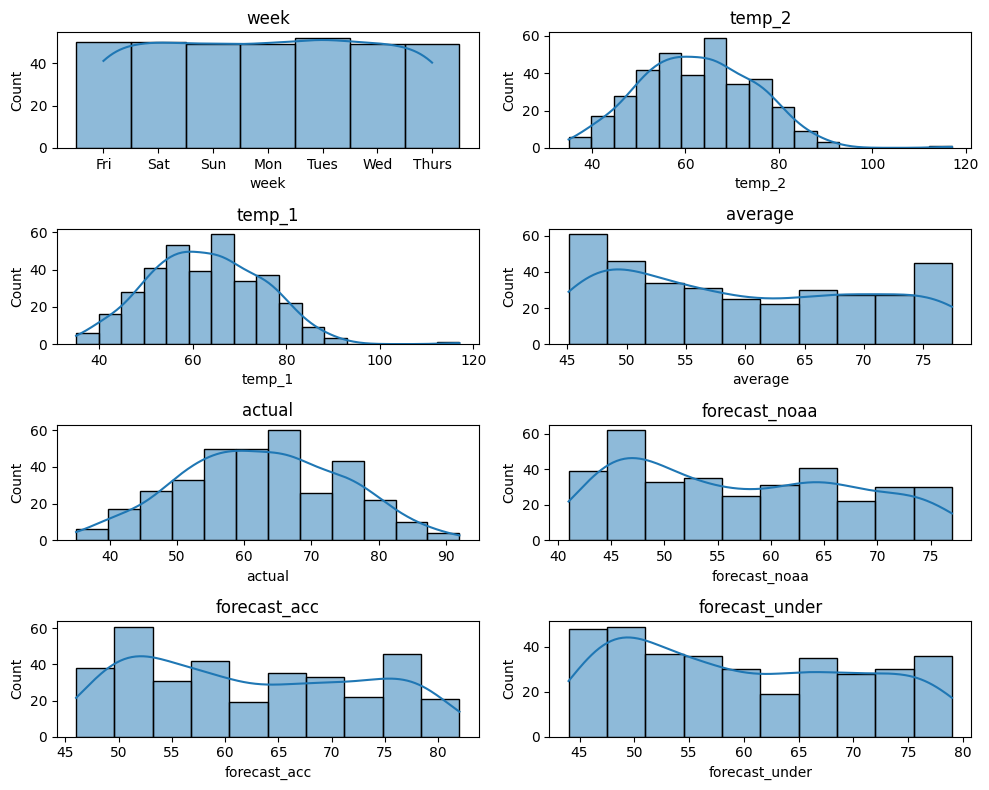

           temp_2      temp_1     average      actual  forecast_noaa  \
count  348.000000  348.000000  348.000000  348.000000     348.000000   
mean    62.652299   62.701149   59.760632   62.543103      57.238506   
min     35.000000   35.000000   45.100000   35.000000      41.000000   
25%     54.000000   54.000000   49.975000   54.000000      48.000000   
50%     62.500000   62.500000   58.200000   62.500000      56.000000   
75%     71.000000   71.000000   69.025000   71.000000      66.000000   
max    117.000000  117.000000   77.400000   92.000000      77.000000   
std     12.165398   12.120542   10.527306   11.794146      10.605746   

       forecast_acc  forecast_under      friend                           date  
count    348.000000      348.000000  348.000000                            348  
mean      62.373563       59.772989   60.034483  2016-06-30 03:10:20.689655296  
min       46.000000       44.000000   28.000000            2016-01-01 00:00:00  
25%       53.000000       5

In [ ]:
df.head()

# year-month- day (년월일 컬럼 생성) 후 df2로 지정
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str))

df2 = df.drop(columns = ['year','month','day'], axis = 1)

cols = df2.columns.difference(['week','date'])

fig, axes = plt.subplots(4,2 , figsize = (10,8))

for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = df2.columns[i]
  sns.histplot(df[col_i], kde = True, ax = axes)
  axes.set_title(col_i)

plt.tight_layout()
plt.show()


print(df2.describe())

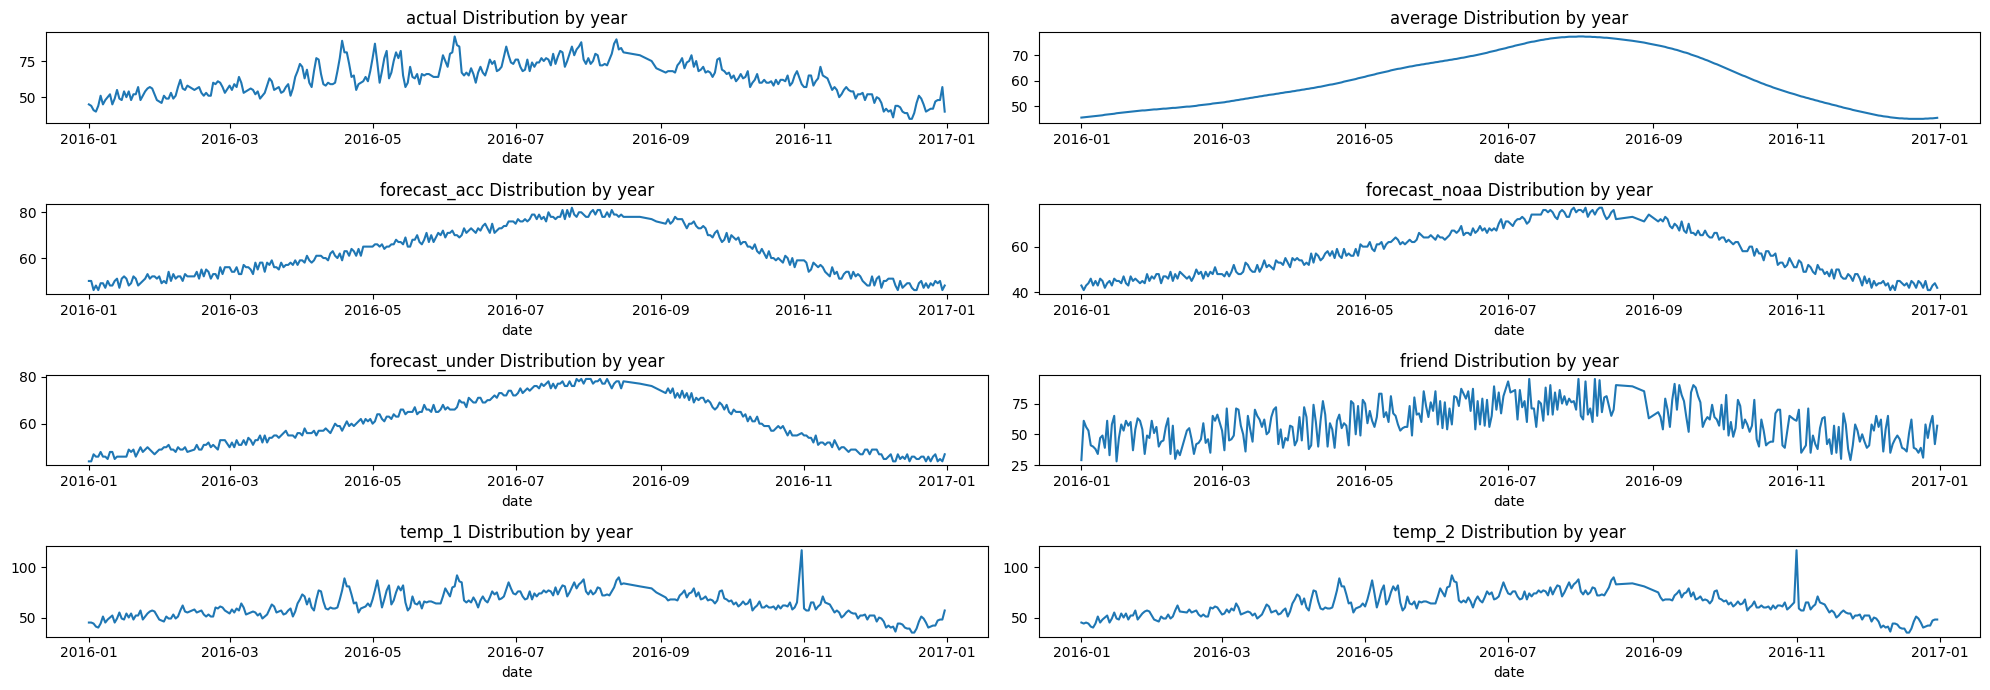

In [ ]:
cols = df2.columns.difference(['week','date'])

fig, axes = plt.subplots(4,2, figsize = (20,7))
for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = df2[cols].columns[i]
  target = df2.groupby('date')[col_i].sum()
  sns.lineplot(x = target.index , y = target.values , ax = axes)
  axes.set_title(f'{col_i} Distribution by year')

plt.tight_layout()

In [ ]:
# 최소값부터 최대값까지의 Range 의 날짜를 생성
v = pd.DataFrame(pd.date_range(start=df['date'].dt.strftime('%Y-%m-%d').min(), end=df['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values

# range 값에서 실제 date의 값을 비교한 결과 18일치의 데이터가 결측
len(set(v) - set(df2['date'].dt.strftime('%Y-%m-%d')))

18

<Axes: >

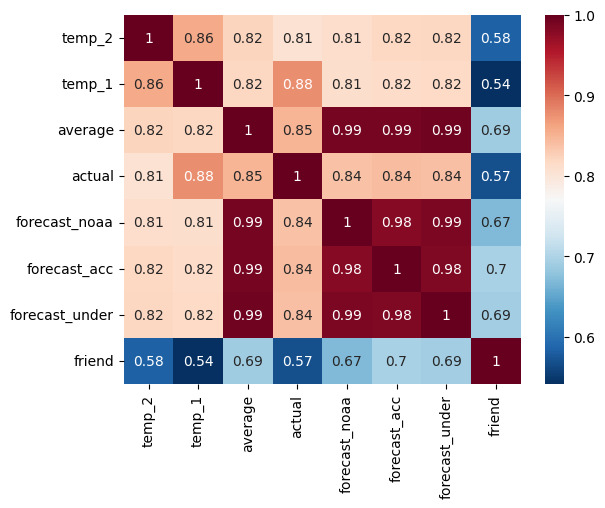

In [ ]:
cor_mat = df2.drop(columns= ['week','date']).corr()

sns.heatmap(cor_mat , cmap = 'RdBu_r', annot= True)

In [ ]:
print("""
EDA
1) 결측치 : 데이터에서 결측치는 존재하지 않는다. 다만, 일별 데이터를 비교해본 결과 18건의 데이터 누락이 확인되었다.
            시계열 데이터가 아니기 때문에, 보간법을 사용하여 따로 결측치 처리를 하지 않는다.
2) 이상치 : temp2, temp1 에서 max값이 117.000000 75%의 값이 71.000000로 다소 차이가 나지만, 데이터의 분포가 일정한 것으로 봐
            이상치로 보이지 않는다.
3) 상관관계 : average 와 forcaset_noaa, forcast_acc, forcase_uner 가 높은 상관성을 가지고 있기 때문에, (0.9) 다중공선성이
              존재할 수 있고, 각 독립 변수들간 큰 상관성이 있을 수도 있어 보인다.
""")


EDA
1) 결측치 : 데이터에서 결측치는 존재하지 않는다. 다만, 일별 데이터를 비교해본 결과 18건의 데이터 누락이 확인되었다.
            시계열 데이터가 아니기 때문에, 보간법을 사용하여 따로 결측치 처리를 하지 않는다.
2) 이상치 : temp2, temp1 에서 max값이 117.000000 75%의 값이 71.000000로 다소 차이가 나지만, 데이터의 분포가 일정한 것으로 봐
            이상치로 보이지 않는다.
3) 상관관계 : average 와 forcaset_noaa, forcast_acc, forcase_uner 가 높은 상관성을 가지고 있기 때문에, (0.9) 다중공선성이
              존재할 수 있고, 각 독립 변수들간 큰 상관성이 있을 수도 있어 보인다.



## ✅ 데이터 분할 방법 설명
1) 랜덤 분할 : 데이터를 무작위로 섞어 일정 비율로 분할한다. </br>
2) 시계열 분할 : 특정기간을 80%으로 학습 데이터로 사용하고, 20%를 테스트 데이터로 사용



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dummy_df = pd.get_dummies(df, dtype = int)

X = dummy_df.drop(columns = ['friend','year','month','day','date'])
s_X = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
y = dummy_df['friend']

X_train, X_test, y_train, y_test = train_test_split(s_X, y, test_size=0.2, random_state=2 , stratify= dummy_df['month'])


print("""타당성 검토
    데이터는 순차적인 시계열 데이터이지만, 완전한 시계열이 아니기 때문에, 랜덤 분할이 더 적절하다.
    하지만 단순한 랜덤 샘플링 보다는 계절별 데이터가 고르게 분포할 수 있게 month 기준의 계층적 랜덤 샘플링을 적용하여
    모든 계절이 학습과 테스트 데이터에 골고루 분포 될 수 있도록 하여 훈련 데이터의 대표성을 유지할 수 있도록한다.
""")

타당성 검토
    데이터는 순차적인 시계열 데이터이지만, 완전한 시계열이 아니기 때문에, 랜덤 분할이 더 적절하다.
    하지만 단순한 랜덤 샘플링 보다는 계절별 데이터가 고르게 분포할 수 있게 month 기준의 계층적 랜덤 샘플링을 적용하여
    모든 계절이 학습과 테스트 데이터에 골고루 분포 될 수 있도록 하여 훈련 데이터의 대표성을 유지할 수 있도록한다.



📌 문제

        Random Forest 모델 적합 및 검증
        Random Forest 학습 및 예측 결과 해석
        예측 결과 검정 해석, 중요변수 도출
        변수 중요성 분석 및 그래프 출력

MSE : [135.96555893 137.56910357 163.4959125  166.31046364 121.91692364]
MSE Average: 145.05159245454547
r2_score: [0.36541757 0.3918149  0.35728034 0.40554699 0.29615077]
r2_score Average: 0.3632421138325614
0.5044085109076127


 Random Forest 모델 적합 및 검증
 - 데이터에 학습 시키고, K-FOLD 교차 검증을 수행하여, 모델의 일반화 성능을 평가 했다.
 Random Forest 학습 및 예측 결과 해석
 - R² Score 및 MSE를 계산하여 모델 성능(r2_scor는 평균 0.33, 학습시 0,47)
 예측 결과 검정 해석, 중요변수 도출 &  변수 중요성 분석 및 그래프 출력
 - forcaset_acc , average, forecast_under순으로 변수 중요도를 확인 할 수있다.




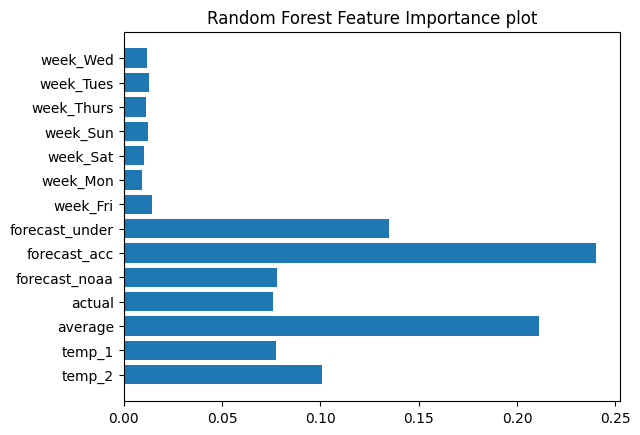

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

# 데이터의 효과적인 검증을 위해 K-Fold 실행

rf = RandomForestRegressor(random_state= 42)

kfold = KFold(n_splits= 5, shuffle= True, random_state = 45)
cv = cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
r2_result =  cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'r2')

mse = -cv
print(f"MSE : {mse}")
print(f"MSE Average: {np.mean(mse)}")
print(f"r2_score: {r2_result}")
print(f"r2_score Average: {np.mean(r2_result)}")


# 랜덤 포레레스 학습 - 변수 중요도 추출
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

r2_value = r2_score(y_test, rf_pred)

print(r2_value)
plt.barh(rf.feature_names_in_ , rf.feature_importances_)
plt.title('Random Forest Feature Importance plot')

print("")
print("""
 Random Forest 모델 적합 및 검증
 - 데이터에 학습 시키고, K-FOLD 교차 검증을 수행하여, 모델의 일반화 성능을 평가 했다.
 Random Forest 학습 및 예측 결과 해석
 - R² Score 및 MSE를 계산하여 모델 성능(r2_scor는 평균 0.33, 학습시 0,47)
 예측 결과 검정 해석, 중요변수 도출 &  변수 중요성 분석 및 그래프 출력
 - forcaset_acc , average, forecast_under순으로 변수 중요도를 확인 할 수있다.

""")

📌 SVM(Support Vector Machine) 모델 적합 및 검증

svm 학습 및 예측 결과 해석

예측 결과 검정 해석, 중요변수 도출

변수 중요성 분석 및 그래프 출력

0.4106504562385421


<BarContainer object of 14 artists>

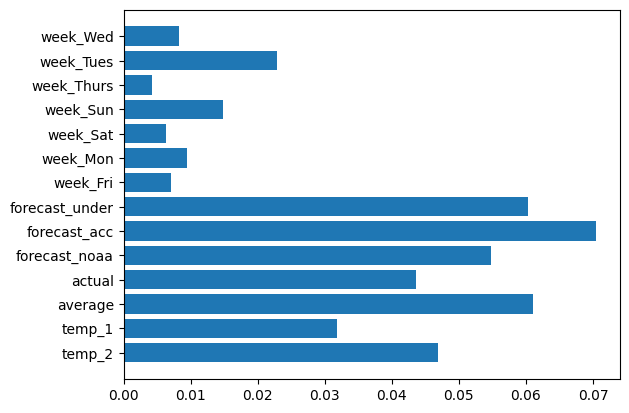

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance   ## SVM 변수 중요도 호출 라이브러리

svr = SVR(kernel= 'rbf')
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

svr_r2 = r2_score(y_test, pred)
print(svr_r2)

# 변수 중요도 - permutaion_importance 사용
perm = permutation_importance(svr, X_train, y_train, n_repeats = 10 , random_state = 42)
plt.barh(X_train.columns, perm.importances_mean)


In [ ]:
# 모델 비교
display(
pd.DataFrame({
    'Model Name' : ['Random_Forest','SVR'] ,
    'R2_score' : [np.mean(r2_result) , svr_r2]

}))

,Model Name,R2_score
0,Random_Forest,0.363242
1,SVR,0.410650


In [ ]:
r2_result

array([0.36541757, 0.3918149 , 0.35728034, 0.40554699, 0.29615077])

#### 2번
5분간격의 가구별 전력 사용량의 데이터

In [ ]:
import matplotlib.pyplot as plt
ttt= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem2.csv')

각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 </br>
총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.</br>
군집화를 위한 데이터 구성의 이유를 설명하라</br>
(군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)

In [ ]:
df = ttt.copy()

df['date'] = pd.to_datetime(df['date'])
df['15_minute'] = df['date'].dt.floor("15T")
df.groupby(['houseCode','15_minute'])[['power consumption']].sum().reset_index()

# 간격 구하는 Code
# 1) dt.floort("15T")
# 2) df.resample("15T")
target = df.groupby(['houseCode']).resample('15min',on = 'date')['power consumption'].sum().reset_index()

# cluster 추가
target['code'] = target['houseCode'].str[-2:]

# hour 시간 구하기
target['hour'] = target['date'].dt.hour

# day 구하기
target['day'] = target['date'].dt.day


print("""
군집화 실행을 위해 housecode/ hour/ day의 컬럼을 만들어주었다.
1) housecdoe : 가구별 특성을 군집화하기 위함
2) hour : 특정 시간(예: 아침, 저녁)의 소비패턴이 다를 수 있다.
3) day : 주중, 주말 소비 패턴차이를 반영할 수 있다.
추가적인 파생 변수를 만들어 군집화를 위한 데이터 구성을 한다
""")

<ipython-input-19-4fa900cafee4>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['15_minute'] = df['date'].dt.floor("15T")



군집화 실행을 위해 housecode/ hour/ day의 컬럼을 만들어주었다.
1) housecdoe : 가구별 특성을 군집화하기 위함
2) hour : 특정 시간(예: 아침, 저녁)의 소비패턴이 다를 수 있다.
3) day : 주중, 주말 소비 패턴차이를 반영할 수 있다. 
추가적인 파생 변수를 만들어 군집화를 위한 데이터 구성을 한다




곡선이 완만해지는 지점을 최적의 K값으로 선택한다. 
완반해지는 부분이 4 혹은 5인 곳으로 보이기 때문에 최적의 K를 5개로 지정하여 군집화를 실행한다. 



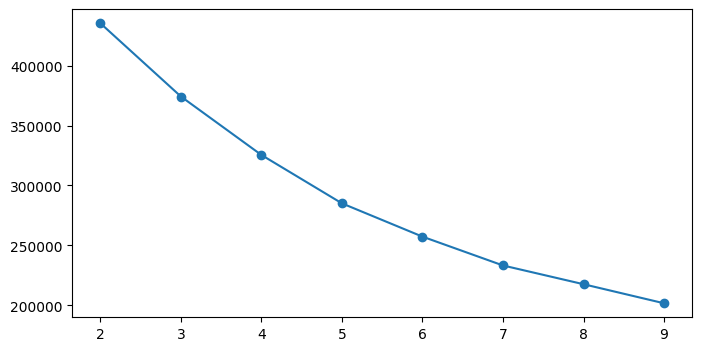

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing  import StandardScaler

t2 = target.iloc[:,2:]

# 거리 기반의 군집화를 위한 데이터 정규화
ss_df = pd.DataFrame(StandardScaler().fit_transform(t2), columns = t2.columns)


# 적절한 K개 구하기
lst = []
for k in range(2, 10) :
  k1 = KMeans(n_clusters = k, random_state = 42)
  k1.fit(ss_df)

  lst.append(k1.inertia_)
  k1.predict(ss_df)


plt.figure(figsize = (8,4))
plt.plot(range(2,10), lst, marker = 'o')

print("""
곡선이 완만해지는 지점을 최적의 K값으로 선택한다.
완반해지는 부분이 4 혹은 5인 곳으로 보이기 때문에 최적의 K를 5개로 지정하여 군집화를 실행한다.
""")

In [ ]:
# K개를 5개로 지정

k5 = KMeans(n_clusters = 5, random_state = 42)
k5.fit(ss_df)
k5.predict(ss_df)

array([2, 2, 2, ..., 4, 0, 0], dtype=int32)

#### 2-2. 히트맵 시각화
2-1의 데이터를 바탕으로 각 군집의 요일, 15분간격별 전력사용량의 합을 구한 후 아래와 같이 시각화 하여라

In [ ]:
# Cluster 지정
target['cluster'] = k5.labels_

# 요일명
target['day_name'] = target['date'].dt.day_name()

# 분/초
target['min'] = target.date.dt.strftime('%H:%M')

target.head()

,houseCode,date,power consumption,code,hour,day,cluster,day_name,min
0,house_00,2050-01-01 00:00:00,136.249952,00,0,1,2,Saturday,00:00
1,house_00,2050-01-01 00:15:00,98.283387,00,0,1,2,Saturday,00:15
2,house_00,2050-01-01 00:30:00,53.967679,00,0,1,2,Saturday,00:30
3,house_00,2050-01-01 00:45:00,204.821270,00,0,1,2,Saturday,00:45
4,house_00,2050-01-01 01:00:00,150.760786,00,1,1,2,Saturday,01:00


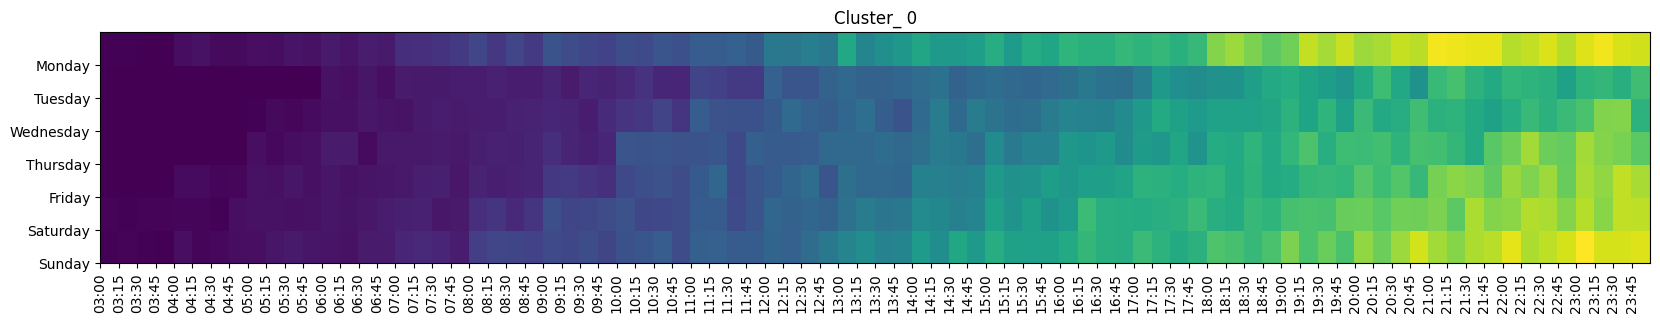

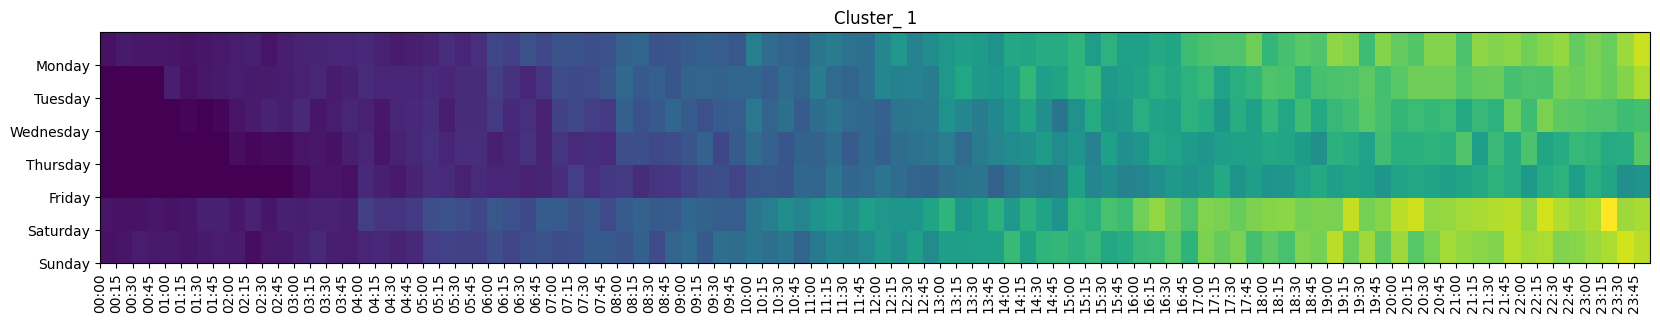

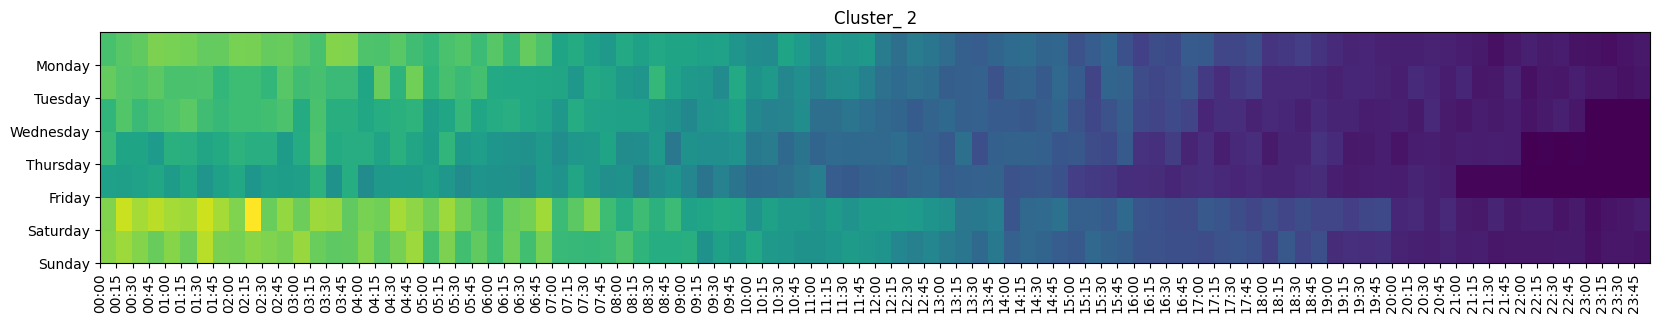

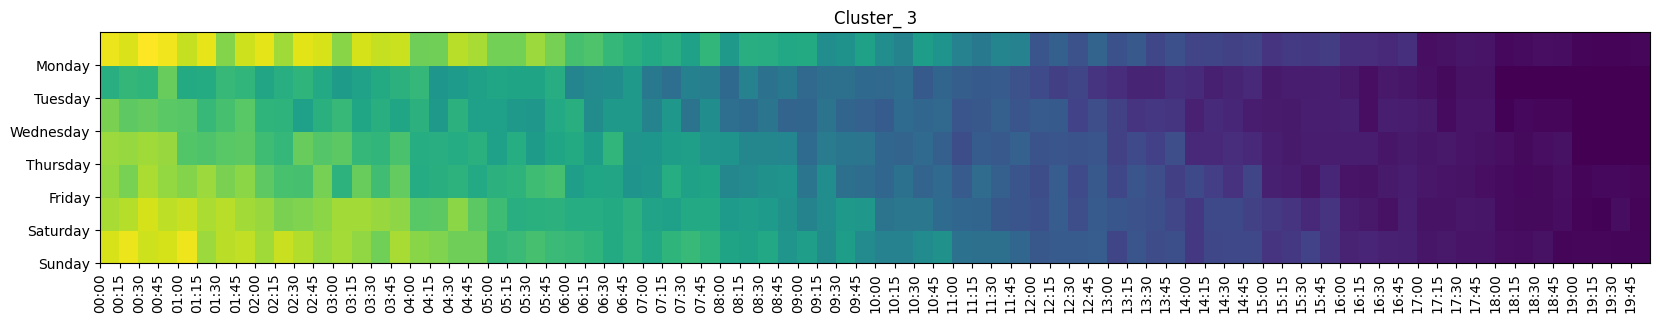

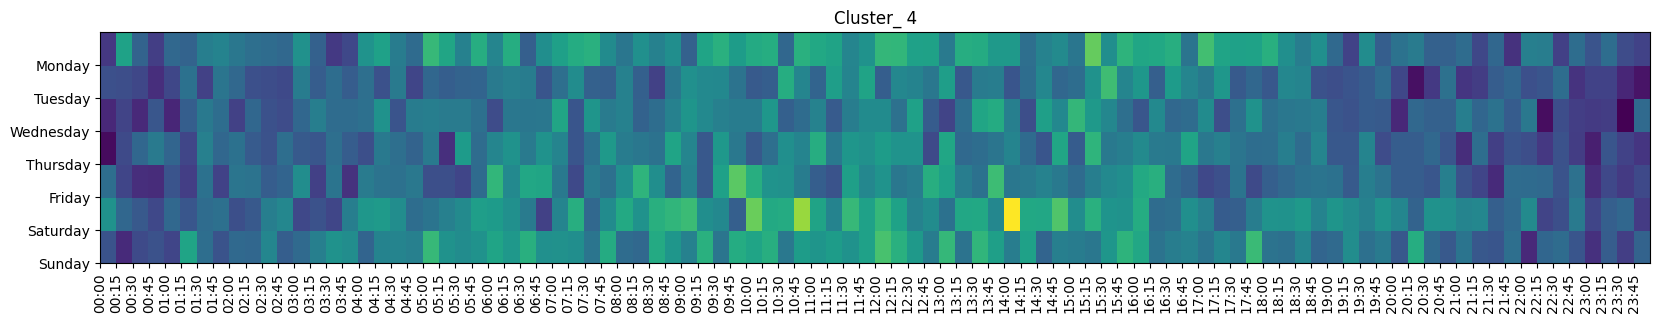

In [ ]:
t2 = target.groupby(['cluster','min','day_name'])['power consumption'].sum().reset_index()

day_order =['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday']


for cluster in range(5) :
  plt.figure(figsize = (20, 3))

  cluster_df = t2.loc[t2.cluster == cluster]
  pivot_df = cluster_df.pivot(index = 'day_name', columns = 'min', values = 'power consumption').fillna(0).reindex(day_order)


  plt.pcolor(pivot_df)
  plt.title(f"Cluster_ {cluster}")
  plt.xticks(range(len(pivot_df.columns)), pivot_df.columns, rotation = 90)
  plt.yticks(range(len(pivot_df.index)), pivot_df.index)

### 3번
태양광 데이터

In [ ]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem3.csv')
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,NaN,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,NaN,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,NaN,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,NaN,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,NaN,0.0,0.0,131.0


### 3-1
* 데이터셋 분할 및 결과 검증

* 데이터셋 7:3 분할

* 데이터 전처리 및 예측 모델 생성

* 모델 성능 검증 : RMSE, R제곱, 정확도(아래 방식으로 연산)로 구하여라

* 정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 * (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.
분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.

* 최종 결과 제출 : 소수점 3째자리 반올림

In [ ]:
# 파생 변수를 생성하여 예측 모델의 성능 개선

# 1) date 전처리 - hour를 추출해, 낮과 밤으로 구분 하는 파생 변수 추가
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

def day_order(x) :
  if 6 < x < 18 :
    return 1
  else :
    return 0

df['day_and_night'] = df['TIMESTAMP'].dt.hour.apply(day_order)

# 2) 주말 여부
df['weekend'] = df['TIMESTAMP'].dt.dayofweek.apply(lambda x : 1 if x >= 5 else 0)


# 3) Solar 삭제
df= df.drop(columns = 'SOLAR', axis = 1)

df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL,day_and_night,weekend
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,0.0,0.0,57.0,0,0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,0.0,0.0,76.0,0,0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,0.0,0.0,100.0,0,0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,0.0,0.0,111.0,0,0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,0.0,0.0,131.0,0,0


In [ ]:
cols = df.columns.difference(['TIMESTAMP']).tolist()

fig, axes = plt.subplots(2, 5, figsize = (20, 10))

for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = cols[i]
  sns.histplot(df[col_i], ax = axes)

plt.tight_layout()


print("""
모델 선정의 이유 : 데이터 분포를 기준으로
1. 정규분포가 아닌 분포가 SOLAR PV, SOLAR THERMAL 등이 존재
2. 이상치가 존재하여, 일반적인 선형 회귀 모델 적용이 어려움

랜텀 포레스트의 강점
1) 비선형 데이터의 처리 기능 : BIOMASS, WIND TOAL의 분포는 비대칭적이면 복잡한 패턴이지만, 비선형 관계를 효과적으로 학습 할 수 있다.
2) 이상치/노이즈에 강함 : 극단적인 분포를 가지는 변수에 대해서 이상치 영향을 줄일 수 있는 장점
3) 다차원 데이터 학습 가능 : 여러 차원 데이터를 조합하여 성능을 향상시킴으로, 다양한 파생 변수를 포함한 모델링이 가능하다.

""")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 단위 표준화
X = df.drop(columns = ['TIMESTAMP','SOLAR PV'])
y = df['SOLAR PV']

ss = StandardScaler()
s_X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(s_X, y, test_size = 0.3, random_state = 42)


# 모델 선정 - RandomForeset
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


# 정확도 계산
def score(y_true, y_pred) :
  if y_true == 0 :
    return 0.5
  if y_pred == 0 :
    return 0.5

  if y_true > y_pred :
    return 1 - (y_pred / y_true)

  else :
    return 1 - (y_true / y_pred)


acc = []
for i, k in enumerate(y_test) :
  acc.append(score(k, y_pred[i]))




RMSE =  np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accu = 1 - (sum(acc) / len(acc))
print(RMSE)
print(r2)
print(accu)

451.79151854111905
0.964092215137464
0.6620490864593693


In [ ]:

# 실제값>예측값인 경우 : (1-예측값/실제값),
# 실제값<예측값인 경우 : (1- 실제값/예측값) 으로 하고
#  이것들을 평균낸 후 1에서 뺀값으로 한다.
# 분수식의 분모가 0인 경우의 정확도는 0.5로 취급
def customer_score(y_true, y_pred) :
  lst = []
  for  actual, predicted in zip(y_true, y_pred) :
    if actual == 0 :
      accuracy =  0.5
    elif predicted  == 0 :
      accuracy = 0.5

    elif actual > predicted :
      accuracy =  1 - (predicted / actual)

    else :
      accuracy = 1 - (actual / predicted)

    lst.append(accuracy)

  return 1 - np.mean(lst)

print(customer_score(y_test, y_pred))


0.6620490864593702
